# Meteo-Open API Connection

### Este Notebook tem como principal objetivo a conexão http à API da Open-Meteo

Para além disso, tem como objetivos:
- Conversão para DataFrame
- Uma visualização simples dos dados
- Guardar os dados em CSV

In [70]:
import requests

date = "2026-01-13"  # dia desejado YYYY-MM-DD
url = "https://archive-api.open-meteo.com/v1/archive"

params = {
    "latitude": 41.1579,
    "longitude": -8.6291,
    "start_date": "2019-01-01",
    "end_date": "2023-12-31",
    "hourly": [
        "temperature_2m",
        "shortwave_radiation",
        "cloudcover"
    ],
    "timezone": "Europe/Lisbon"
}

response = requests.get(url, params=params)

print(f"Código de Status: {response.status_code}")

print(f"Conteúdo da Resposta: {response.json()}")

Código de Status: 200
Conteúdo da Resposta: {'latitude': 41.159927, 'longitude': -8.626617, 'generationtime_ms': 110.68606376647949, 'utc_offset_seconds': 0, 'timezone': 'Europe/Lisbon', 'timezone_abbreviation': 'GMT', 'elevation': 88.0, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C', 'shortwave_radiation': 'W/m²', 'cloudcover': '%'}, 'hourly': {'time': ['2019-01-01T00:00', '2019-01-01T01:00', '2019-01-01T02:00', '2019-01-01T03:00', '2019-01-01T04:00', '2019-01-01T05:00', '2019-01-01T06:00', '2019-01-01T07:00', '2019-01-01T08:00', '2019-01-01T09:00', '2019-01-01T10:00', '2019-01-01T11:00', '2019-01-01T12:00', '2019-01-01T13:00', '2019-01-01T14:00', '2019-01-01T15:00', '2019-01-01T16:00', '2019-01-01T17:00', '2019-01-01T18:00', '2019-01-01T19:00', '2019-01-01T20:00', '2019-01-01T21:00', '2019-01-01T22:00', '2019-01-01T23:00', '2019-01-02T00:00', '2019-01-02T01:00', '2019-01-02T02:00', '2019-01-02T03:00', '2019-01-02T04:00', '2019-01-02T05:00', '2019-01-02T06:00', '2019-01-02

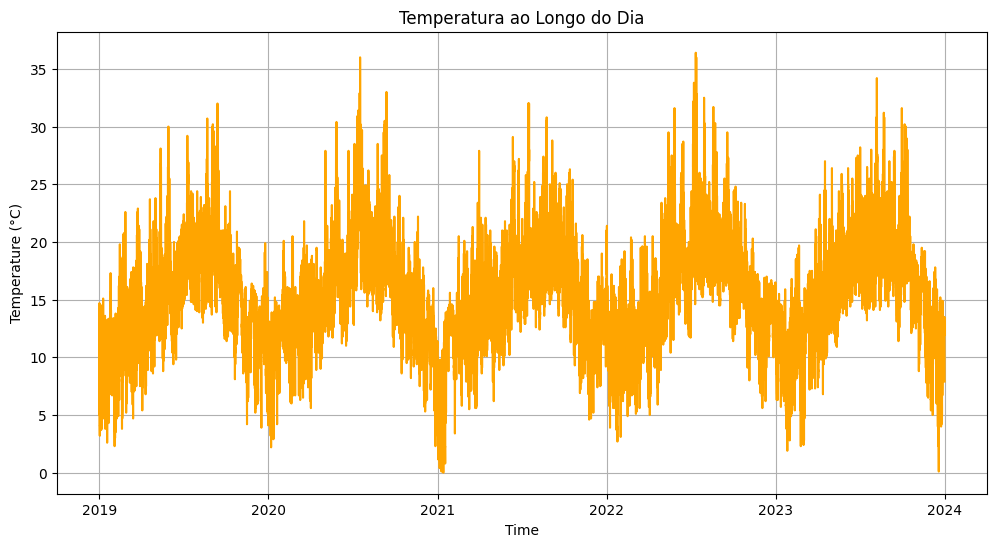

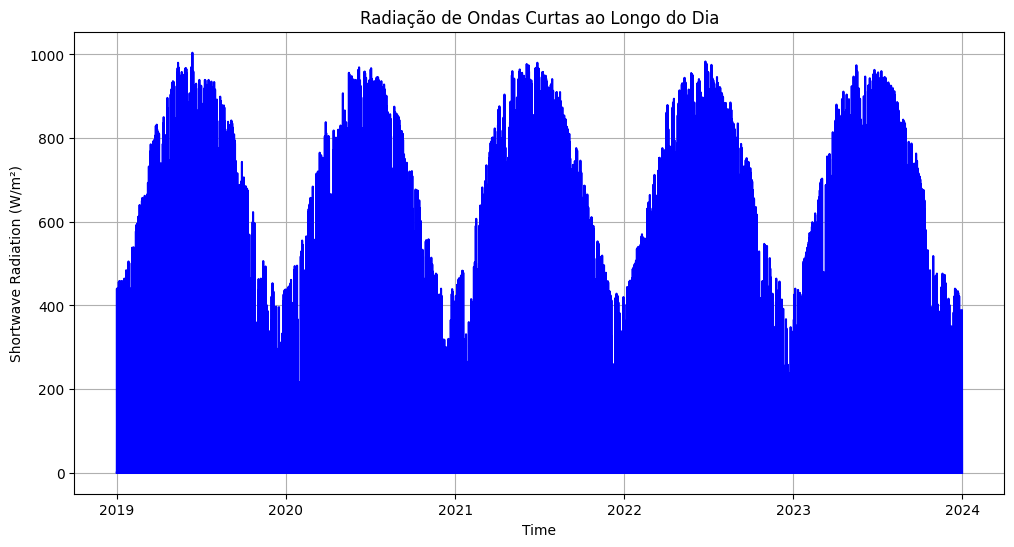

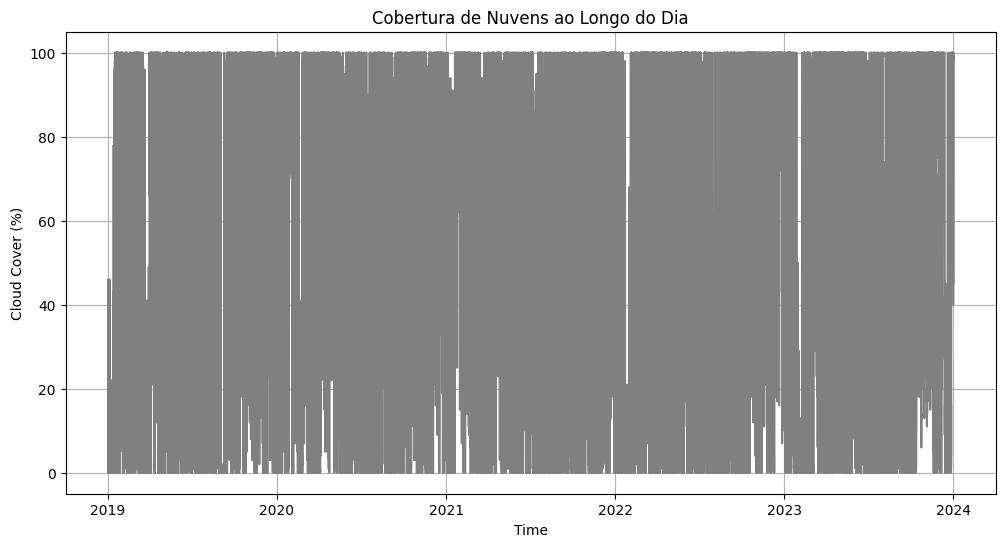

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

data = response.json()

hourly = data["hourly"]

df = pd.DataFrame({
    "time": hourly["time"],
    "temperature_2m": hourly["temperature_2m"],
    "shortwave_radiation": hourly["shortwave_radiation"],
    "cloudcover": hourly["cloudcover"]
})

df['time'] = pd.to_datetime(df['time'])

df.head()

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['temperature_2m'], label='Temperature (°C)', color='orange')
plt.title('Temperatura ao Longo do Dia')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['shortwave_radiation'], label='Shortwave Radiation (W/m²)', color='blue')
plt.title('Radiação de Ondas Curtas ao Longo do Dia')
plt.xlabel('Time')
plt.ylabel('Shortwave Radiation (W/m²)')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['cloudcover'], label='Cloud Cover (%)', color='gray')
plt.title('Cobertura de Nuvens ao Longo do Dia')
plt.xlabel('Time')
plt.ylabel('Cloud Cover (%)')
plt.grid()
plt.show()

df.to_csv(f"../Data/Raw/weather_data_{params['start_date']}_to_{params['end_date']}.csv", index=False)